In [1]:
import os
import holidays 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

path_stock = "../data/stock"
path_fed = "../data/fed"

In [ ]:
AAPL_df = pd.read_csv(f"{path_stock}/AAPL_stock.csv")
AMZN_df = pd.read_csv(f"{path_stock}/AMZN_stock.csv")
GOOGL_df = pd.read_csv(f"{path_stock}/GOOGL_stock.csv")
MSFT_df = pd.read_csv(f"{path_stock}/MSFT_stock.csv")
TSLA_df = pd.read_csv(f"{path_stock}/TSLA_stock.csv")
NVDA_df = pd.read_csv(f"{path_stock}/NVDA_stock.csv")
macro_df = pd.read_csv(f"{path_stock}/macro_indicators_full.csv")


In [11]:
# Convert the 'date' column to datetime objects
macro_df['Date'] = pd.to_datetime(macro_df['Date'])
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               6392 non-null   datetime64[ns]
 1   DXY                6392 non-null   float64       
 2   S&P500             6362 non-null   float64       
 3   VIX                6362 non-null   float64       
 4   Gold               6180 non-null   float64       
 5   Oil_WTI            6189 non-null   float64       
 6   Lithium_ETF        3708 non-null   float64       
 7   Benzene_Proxy      4408 non-null   float64       
 8   Electricity_Proxy  6362 non-null   float64       
 9   NASDAQ100          6362 non-null   float64       
 10  NASDAQ_Composite   6362 non-null   float64       
 11  Tech_Sector_Index  6362 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 599.4 KB


In [12]:
macro_df.isnull().sum()

Date                    0
DXY                     0
S&P500                 30
VIX                    30
Gold                  212
Oil_WTI               203
Lithium_ETF          2684
Benzene_Proxy        1984
Electricity_Proxy      30
NASDAQ100              30
NASDAQ_Composite       30
Tech_Sector_Index      30
dtype: int64

In [3]:
def process_stock_data(df, ticker_symbol):
    """
    Processes a stock data DataFrame by:
    - Dropping rows with missing values.
    - Resetting the index.
    - Converting specified columns to float.
    - Renaming columns to include the ticker symbol.
    - Converting the 'Price' column to datetime and renaming it to 'date'.
    - Dropping the 'Ticker' column.

    Args:
        df (pd.DataFrame): The input DataFrame containing stock data
                           with columns like 'Price', 'Close', 'High', 'Low',
                           'Open', 'Volume', and 'Ticker'.
        ticker_symbol (str): The ticker symbol of the stock.

    Returns:
        pd.DataFrame: The processed DataFrame.
    """
    df.dropna(inplace=True)
    columns_to_convert = ['Close', 'High', 'Low', 'Open', 'Volume']
    df[columns_to_convert] = df[columns_to_convert].astype(float)
    df["delta"] = df["High"] - df["Low"]
    df["avg"] = (df["High"] + df["Low"])/2
    df["vol_avg"] = df["Volume"] - df["avg"]
    df.rename(columns={"Price": "date",
                        "Close": f"c_{ticker_symbol}",
                        "High": f"h_{ticker_symbol}",
                        "Low": f"l_{ticker_symbol}",
                        "Open": f"o_{ticker_symbol}",
                        "delta": f"d_{ticker_symbol}",
                        "avg": f"a_{ticker_symbol}",
                        "vol_avg": f"va_{ticker_symbol}",
                        'Volume': f'V_{ticker_symbol}'}, inplace=True)

    df['date'] = pd.to_datetime(df['date'])
    df.reset_index(drop=True, inplace=True)
    #df.set_index('date', inplace=True)
    # Drop the 'Ticker' column
    if 'Ticker' in df.columns:
        df.drop('Ticker', axis=1, inplace=True)

    return df

In [4]:
AAPL_clean_df = process_stock_data(AAPL_df, 'AAPL')
AMZN_clean_df = process_stock_data(AMZN_df, 'AMZN')
GOOGL_clean_df = process_stock_data(GOOGL_df, 'GOOGL')
MSFT_clean_df = process_stock_data(MSFT_df, 'MSFT')
TSLA_clean_df = process_stock_data(TSLA_df, 'TSLA')
NVDA_clean_df = process_stock_data(NVDA_df, 'NVDA')

In [13]:
fed_df = pd.read_csv(f"{path_fed}/combined_economic_indicators.csv")

# Rename the 'Unnamed: 0' column to 'date'
fed_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Convert the 'date' column to datetime objects
fed_df['date'] = pd.to_datetime(fed_df['date'])

fed_df.columns

Index(['date', 'cpi', 'fed_rate', 'vix', 'oil', 'gdp', 'nonfarm_payrolls',
       'treasury_yield', 'industrial_production', 'retail_sales', 'pmi',
       'consumer_confidence', 'day_of_week', 'is_holiday', 'is_working_day'],
      dtype='object')

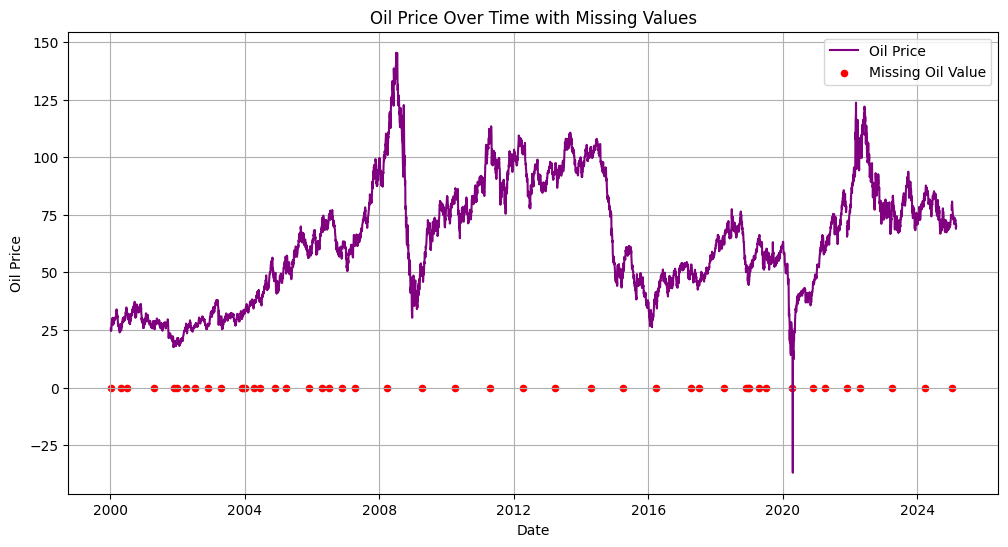

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named eco_indicator_df and 'date' is the index
# If 'date' is not the index, set it first:
eco_indicator_df.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))

# Plot the oil price
plt.plot(eco_indicator_df.index, eco_indicator_df['oil'], label='Oil Price', color='purple')

# Identify missing values in 'oil'
missing_oil = eco_indicator_df[eco_indicator_df['oil'].isnull()]

# Plot the missing values as red dots
plt.scatter(missing_oil.index, [0] * len(missing_oil), color='red', label='Missing Oil Value', s=20)

plt.title('Oil Price Over Time with Missing Values')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True)
plt.show()

First few rows of your DataFrame:
        date    cpi  fed_rate    vix    oil        gdp  nonfarm_payrolls   
0 2000-01-03  169.3      5.45  24.21    NaN  10002.179          131011.0  \
1 2000-01-04  169.3      5.45  27.01  25.56  10002.179          131011.0   
2 2000-01-05  169.3      5.45  26.41  24.65  10002.179          131011.0   
3 2000-01-06  169.3      5.45  25.73  24.79  10002.179          131011.0   
4 2000-01-07  169.3      5.45  21.72  24.79  10002.179          131011.0   

   treasury_yield  industrial_production  retail_sales      pmi   
0            6.58                91.4092      243436.0  17284.0  \
1            6.49                91.4092      243436.0  17284.0   
2            6.62                91.4092      243436.0  17284.0   
3            6.57                91.4092      243436.0  17284.0   
4            6.52                91.4092      243436.0  17284.0   

   consumer_confidence day_of_week  is_holiday  is_working_day  
0                112.0      Monday       

<Figure size 1000x600 with 0 Axes>

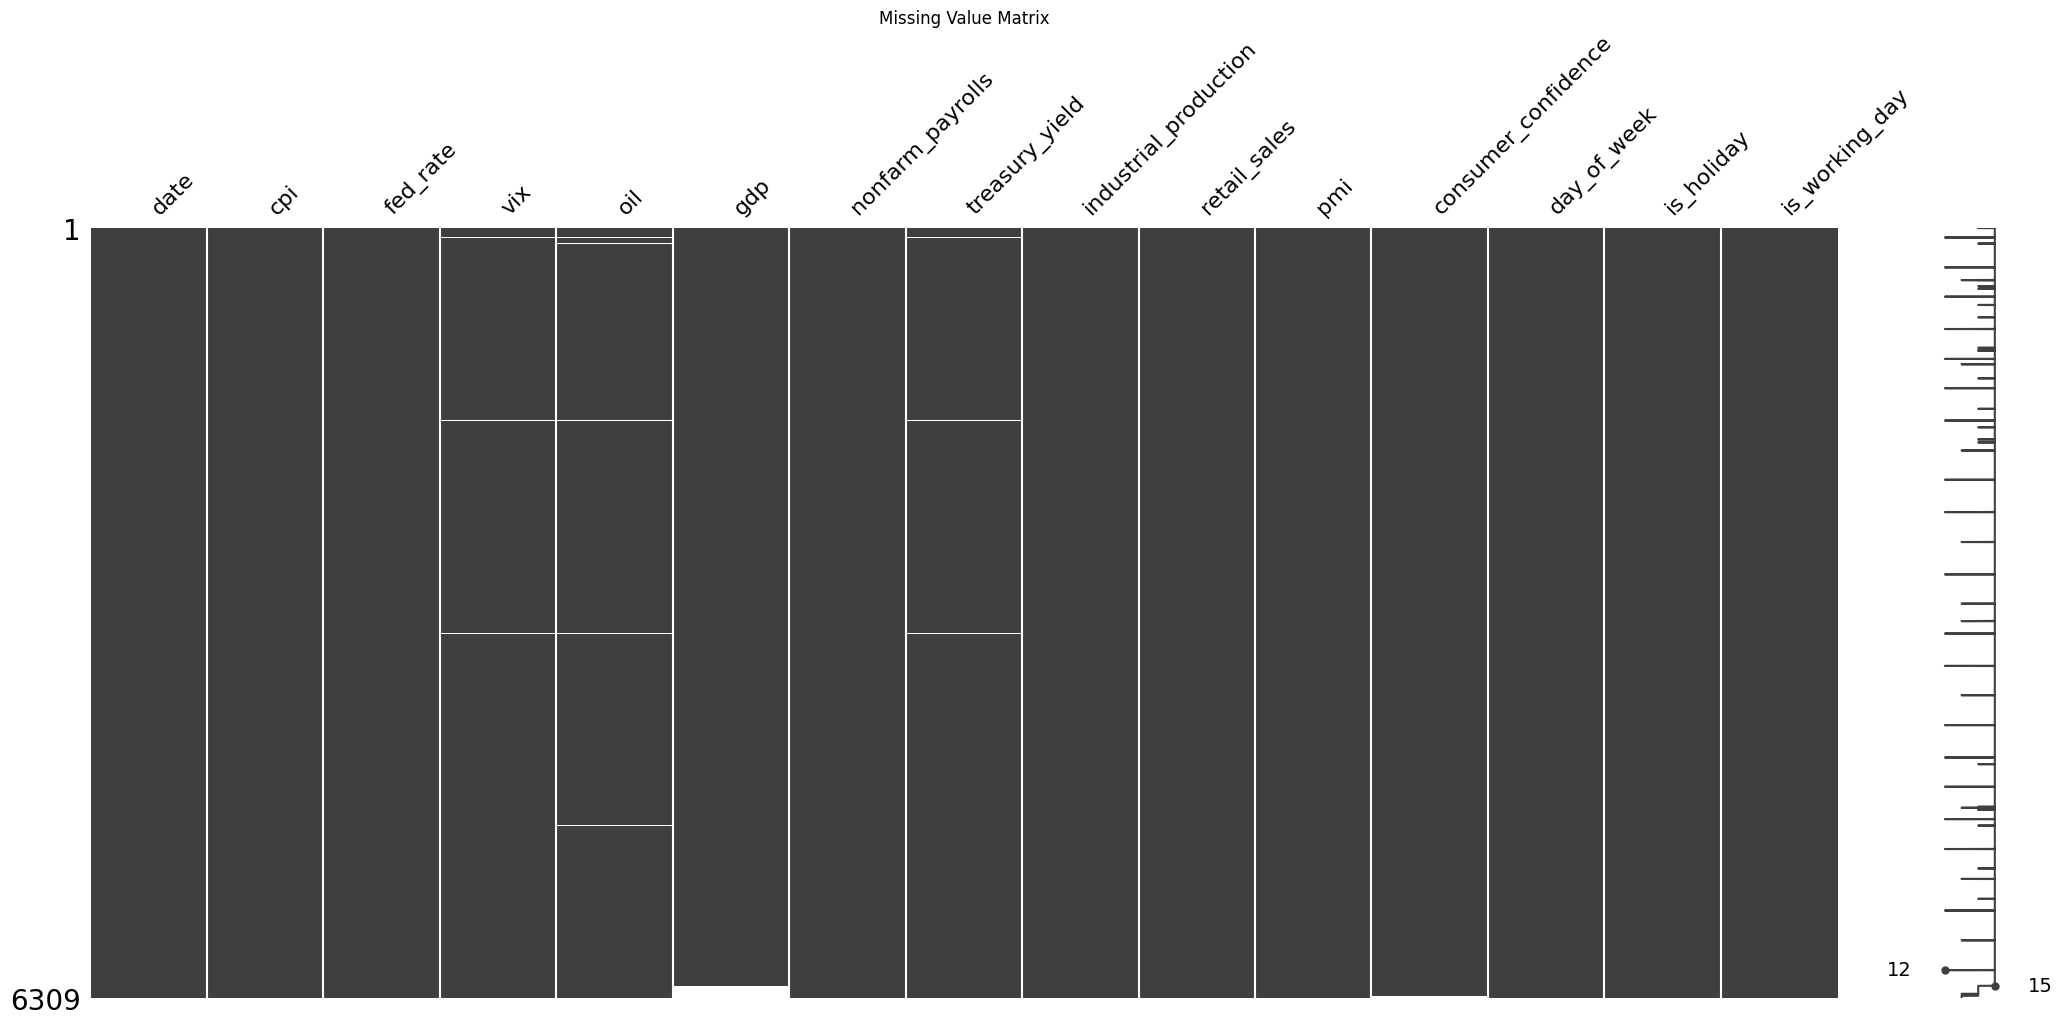

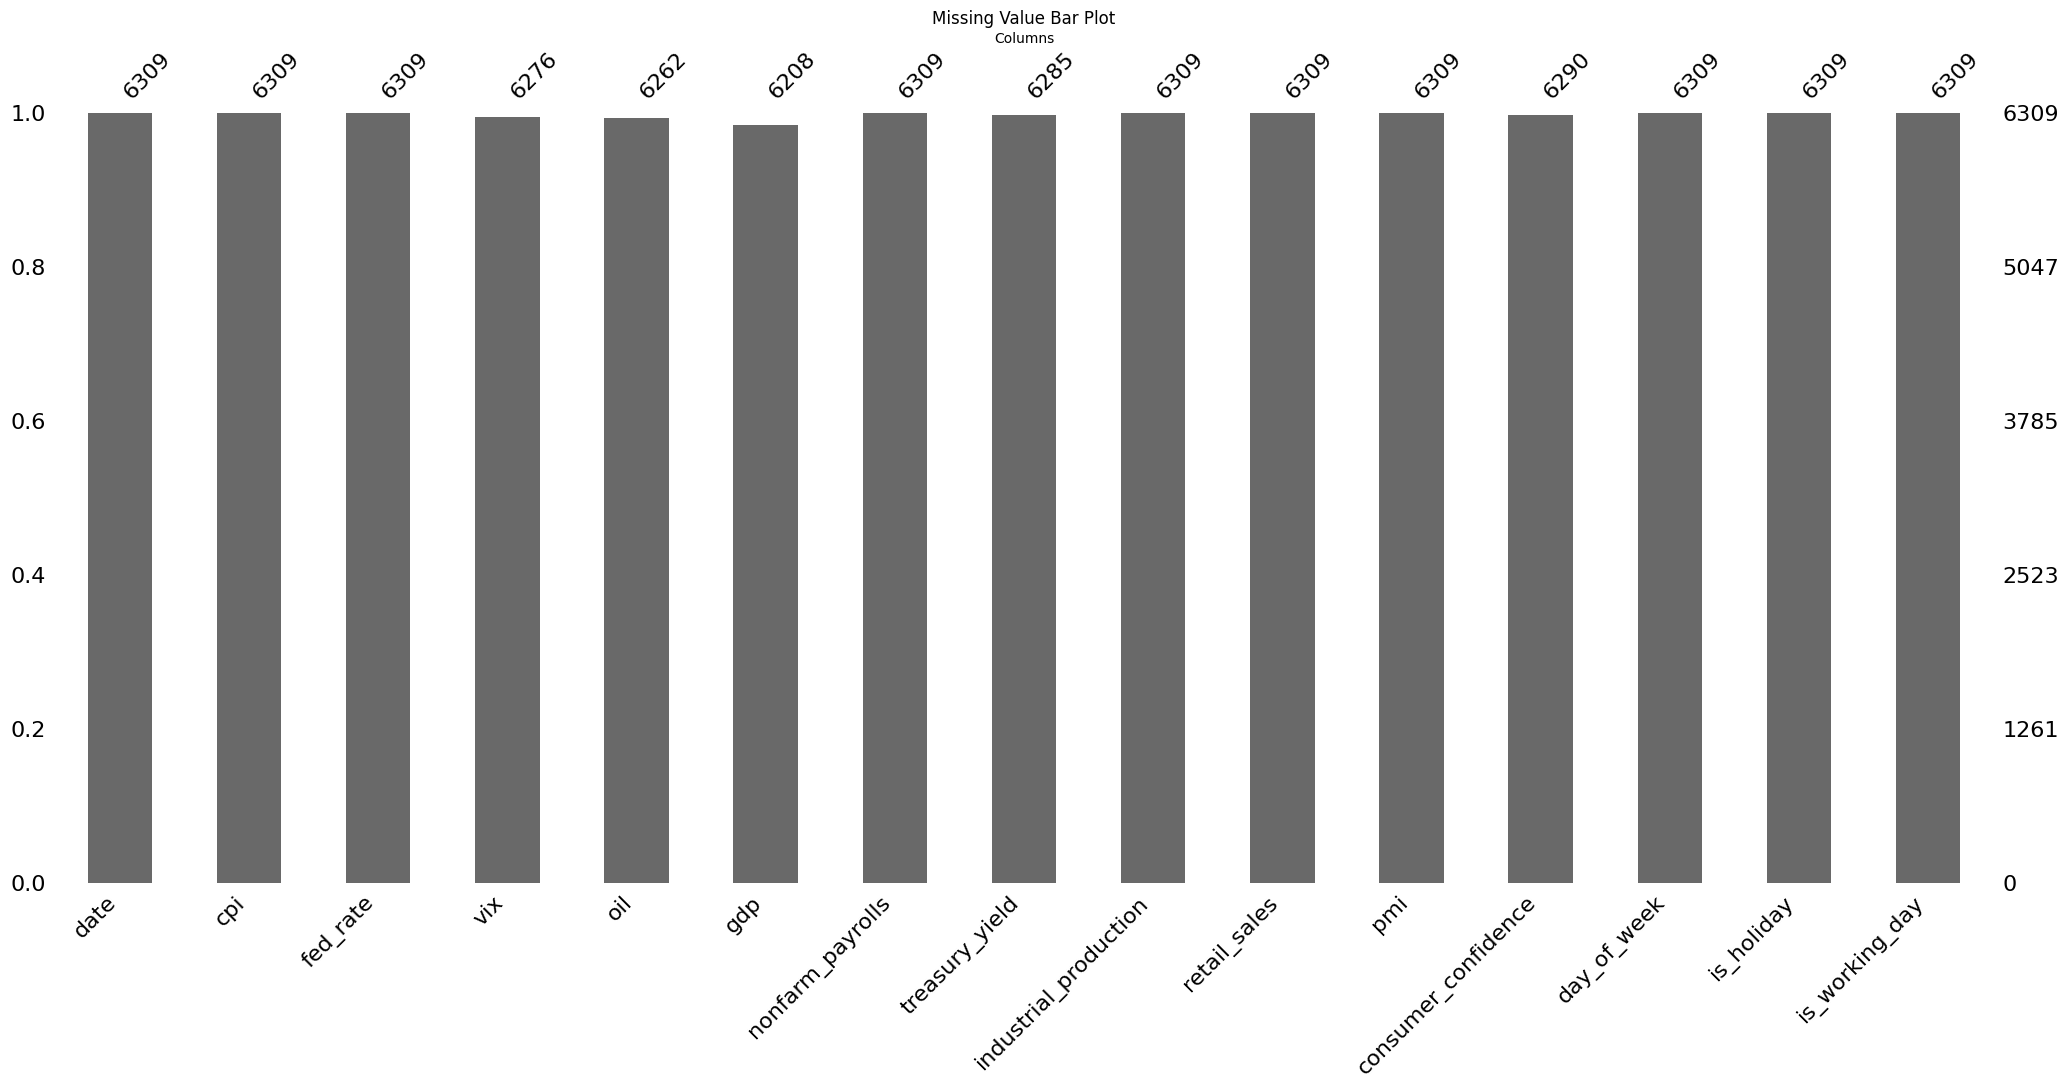

<Figure size 800x600 with 0 Axes>

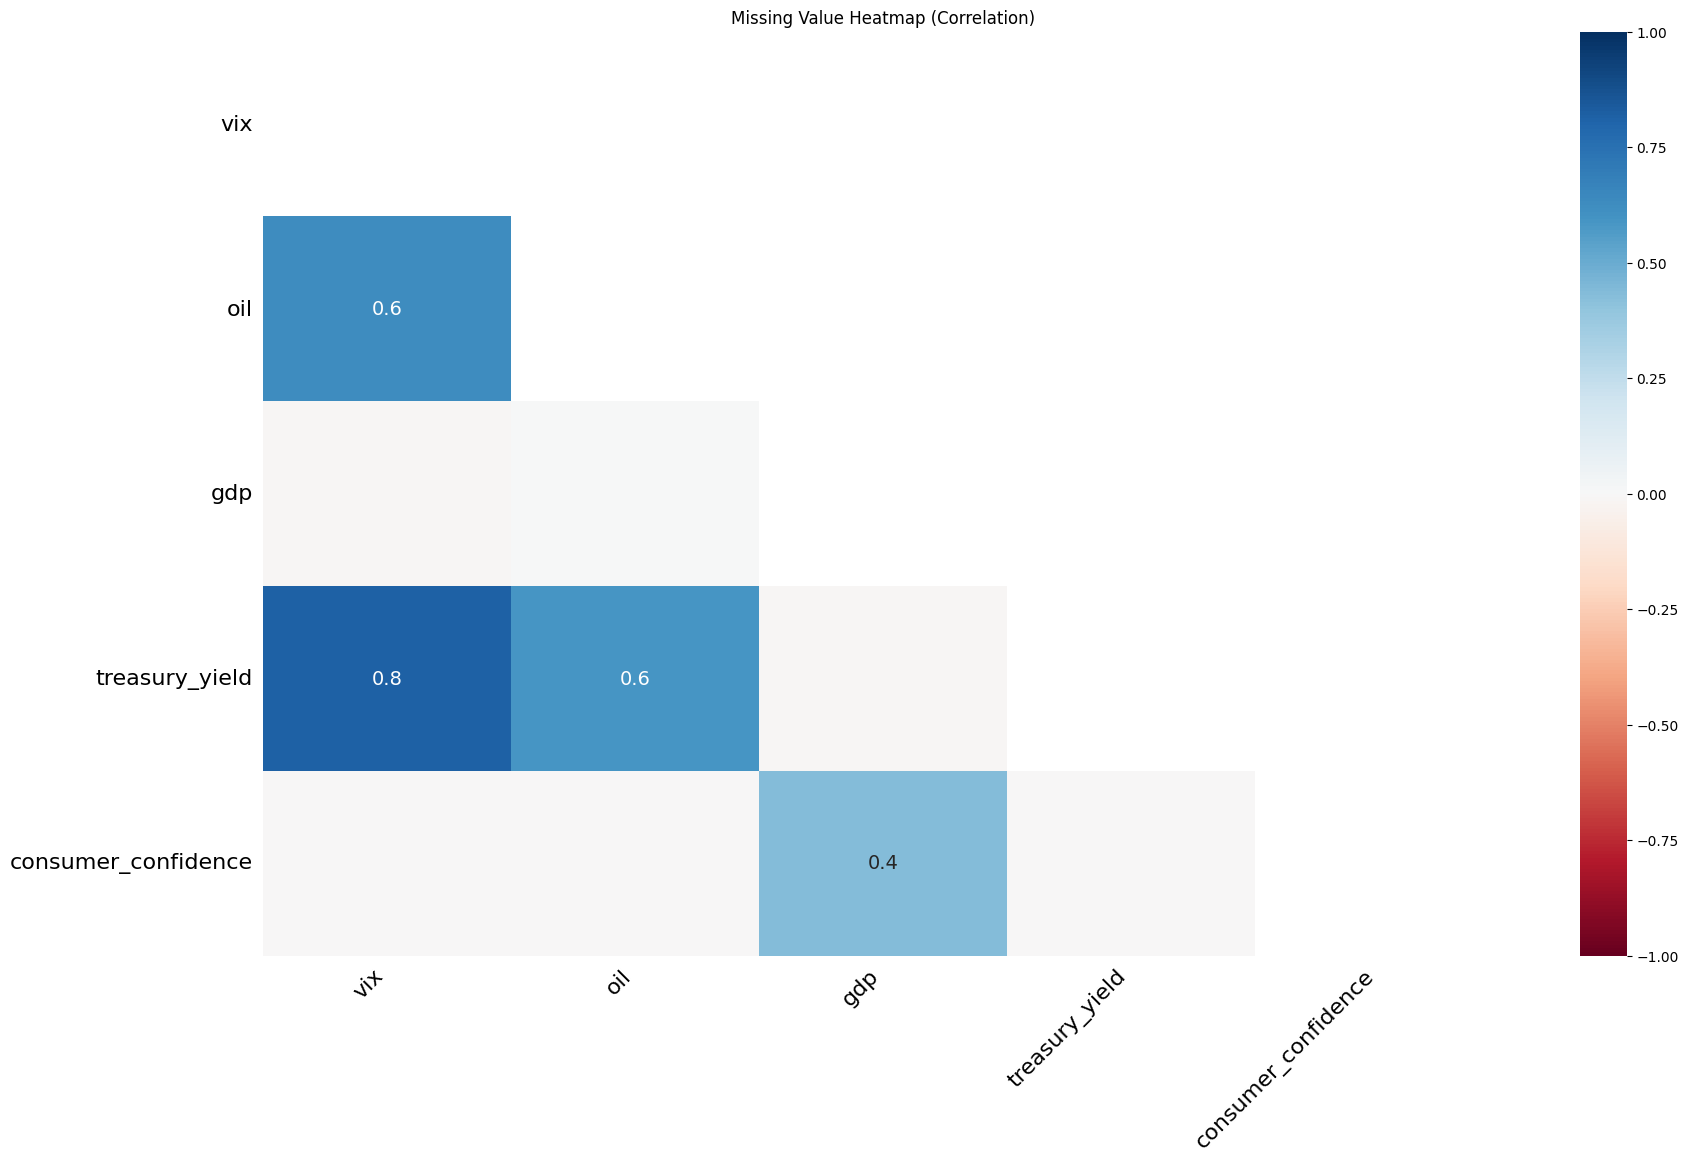

<Figure size 1000x600 with 0 Axes>

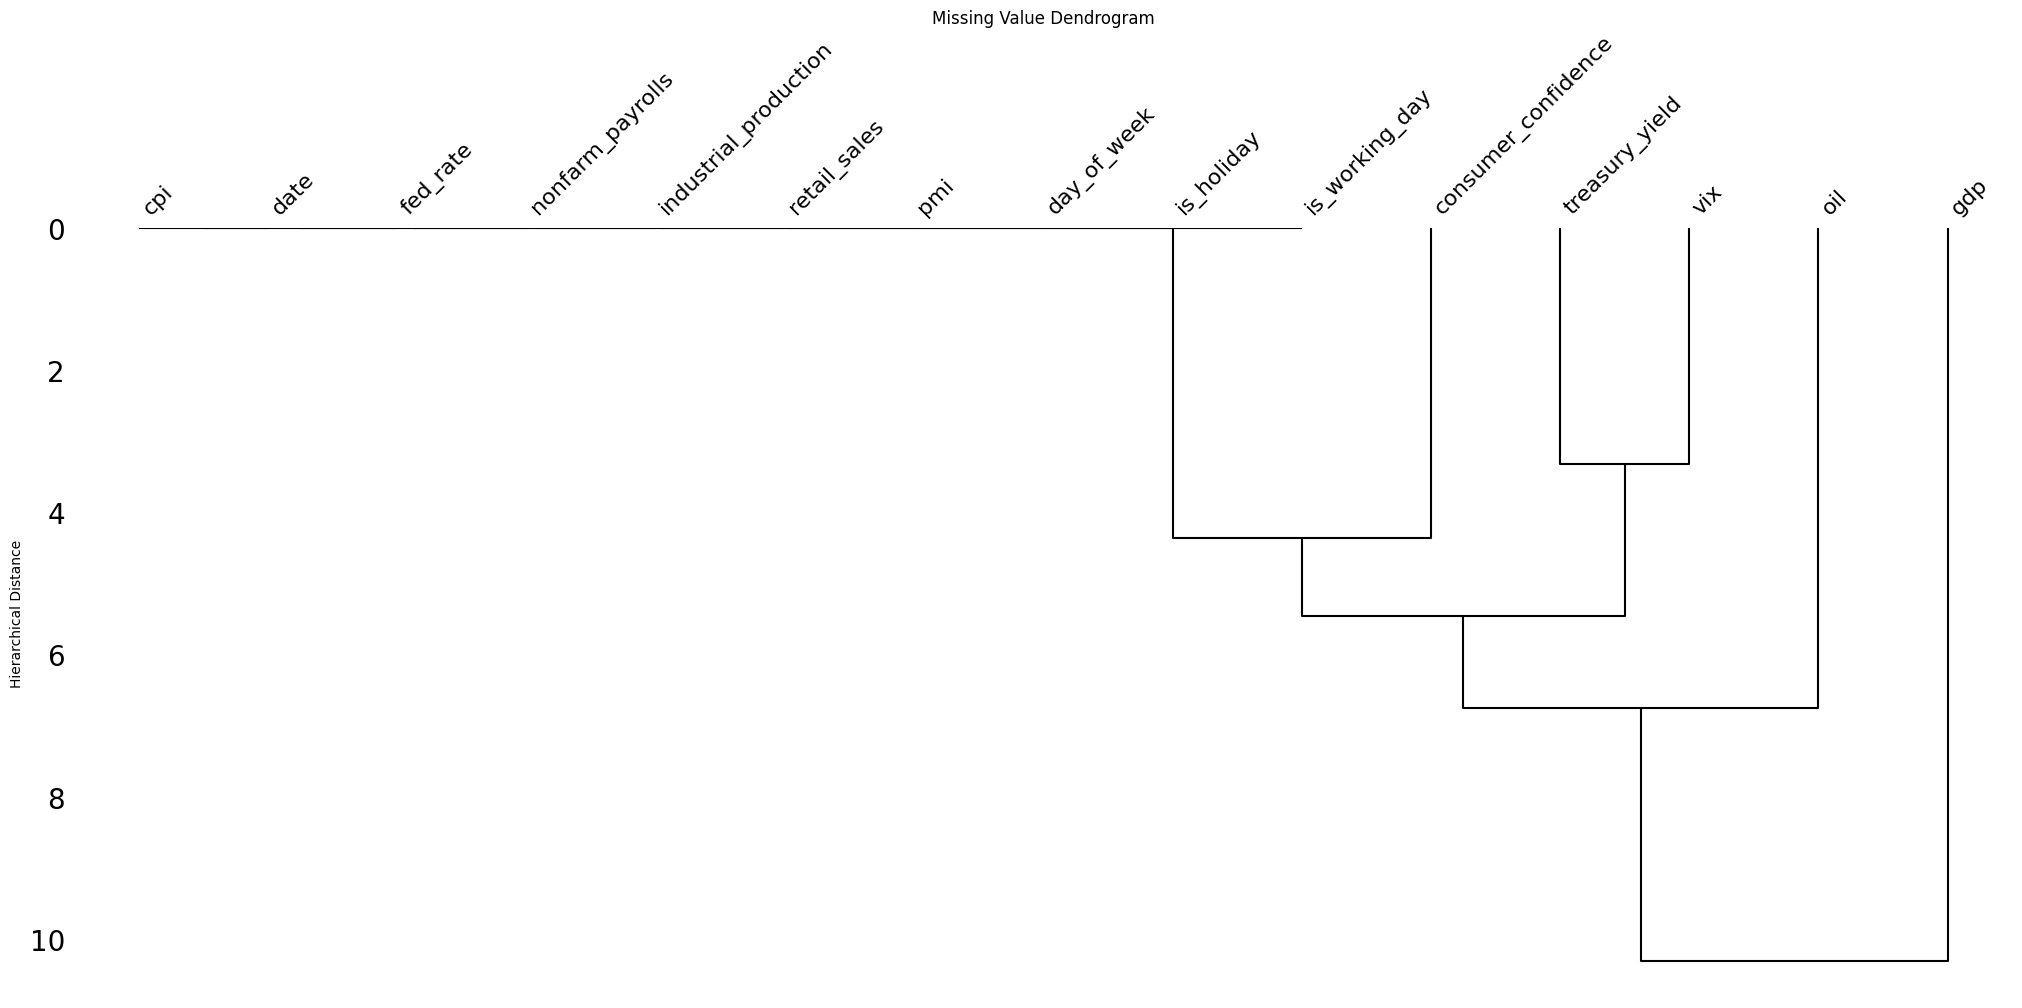

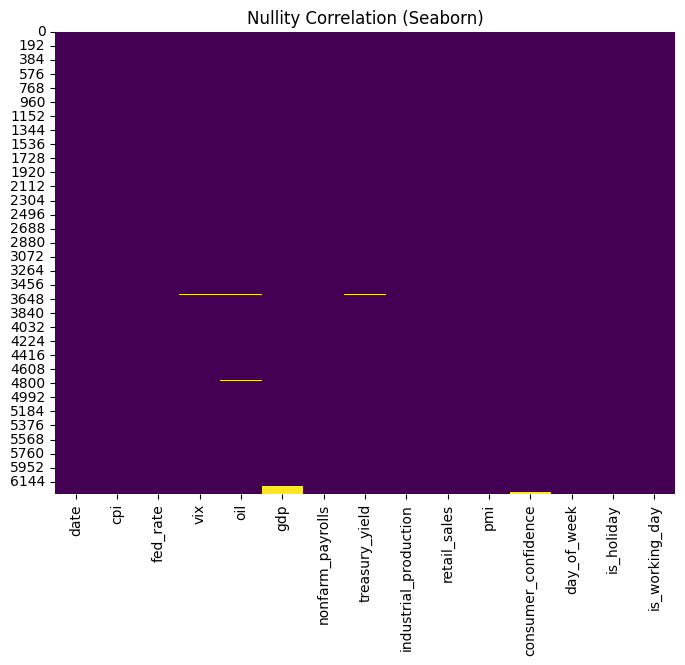


Remember to install the missingno library if you haven't already:
pip install missingno


In [ ]:


# Assuming your DataFrame is named eco_indicator_df
print("First few rows of your DataFrame:")
print(eco_indicator_df.head())
print("\nNumber of missing values per column:")
print(eco_indicator_df.isnull().sum())

# 1. Matrix Plot: Visualize the pattern of missingness
plt.figure(figsize=(10, 6))
msno.matrix(eco_indicator_df)
plt.title('Missing Value Matrix')
plt.show()

# 2. Bar Plot: Visualize the count of missing values per column
plt.figure(figsize=(8, 6))
msno.bar(eco_indicator_df)
plt.title('Missing Value Bar Plot')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

# 3. Heatmap: Visualize the correlation of missingness between columns
plt.figure(figsize=(8, 6))
msno.heatmap(eco_indicator_df)
plt.title('Missing Value Heatmap (Correlation)')
plt.show()

# 4. Dendrogram: Hierarchical clustering of columns based on missingness
plt.figure(figsize=(10, 6))
msno.dendrogram(eco_indicator_df)
plt.title('Missing Value Dendrogram')
plt.ylabel('Hierarchical Distance')
plt.show()

# 5. Nullity Correlation (using seaborn for a simpler correlation matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(eco_indicator_df.isnull(), cbar=False, cmap='viridis')
plt.title('Nullity Correlation (Seaborn)')
plt.show()

print("\nRemember to install the missingno library if you haven't already:")
print("pip install missingno")